<p><img alt="UdeA logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>
<div align="center">
  
<h1> <b> Laboratorio #8 Aprendizaje estadistico,Keras  </b> </h1>

</div>

<!-- <br> le permite hacer espacios -->
<br>

<hr size=10 noshade color="green">
<p>


<div align="right">       

<h3><i> <b> Ortíz Campo Jose David</b> <br>  
Universidad de Antioquia <br>
Instituto de Física  <br>
jose.ortizc@udea.edu.co

</i></h3>
</div>


---

In [1]:
#@title Importación de librerias
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
import tensorflow.keras.backend as K
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.datasets import make_moons


## Pregunta 1





1. Para el dataset make a moon de sklearn, construir un modelo de una red neuronal con keras para clasificar los datos.

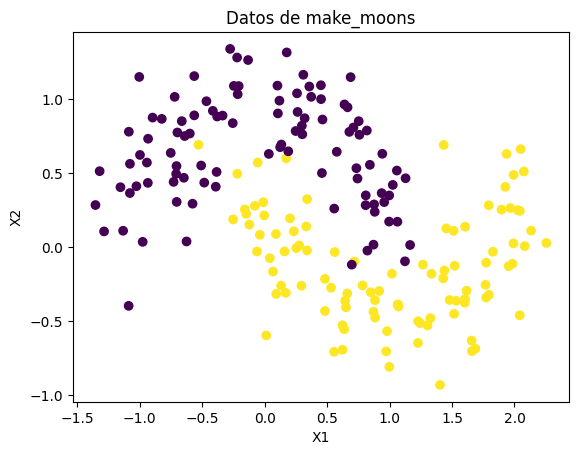

In [2]:
X, y = make_moons(n_samples=200, noise=0.2, random_state=0)

plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis')
plt.title("Datos de make_moons")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [3]:
def build_model2(activation = 'sigmoid', loss='binary_crossentropy'):
  model = keras.models.Sequential()
  model.add(keras.layers.Dense(4, input_dim=2, activation='relu'))
  model.add(keras.layers.Dense(8, activation='relu'))
  model.add(keras.layers.Dense(1, activation = activation))
  opt = keras.optimizers.SGD(learning_rate=0.01)
  model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
  return model

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 187ms/step - accuracy: 0.4934 - loss: 0.7339 - val_accuracy: 0.6500 - val_loss: 0.6471
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5194 - loss: 0.7057 - val_accuracy: 0.6750 - val_loss: 0.6364
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4836 - loss: 0.6982 - val_accuracy: 0.7250 - val_loss: 0.6267
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5405 - loss: 0.6728 - val_accuracy: 0.7500 - val_loss: 0.6179
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5649 - loss: 0.6755 - val_accuracy: 0.7750 - val_loss: 0.6096
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6656 - loss: 0.6575 - val_accuracy: 0.8250 - val_loss: 0.6019
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7254 - loss: 0.6369 - val_accuracy: 0.8500 - val_loss: 0.5946
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7960 - loss: 0.6229 - val_accuracy: 0.9000 - val_loss

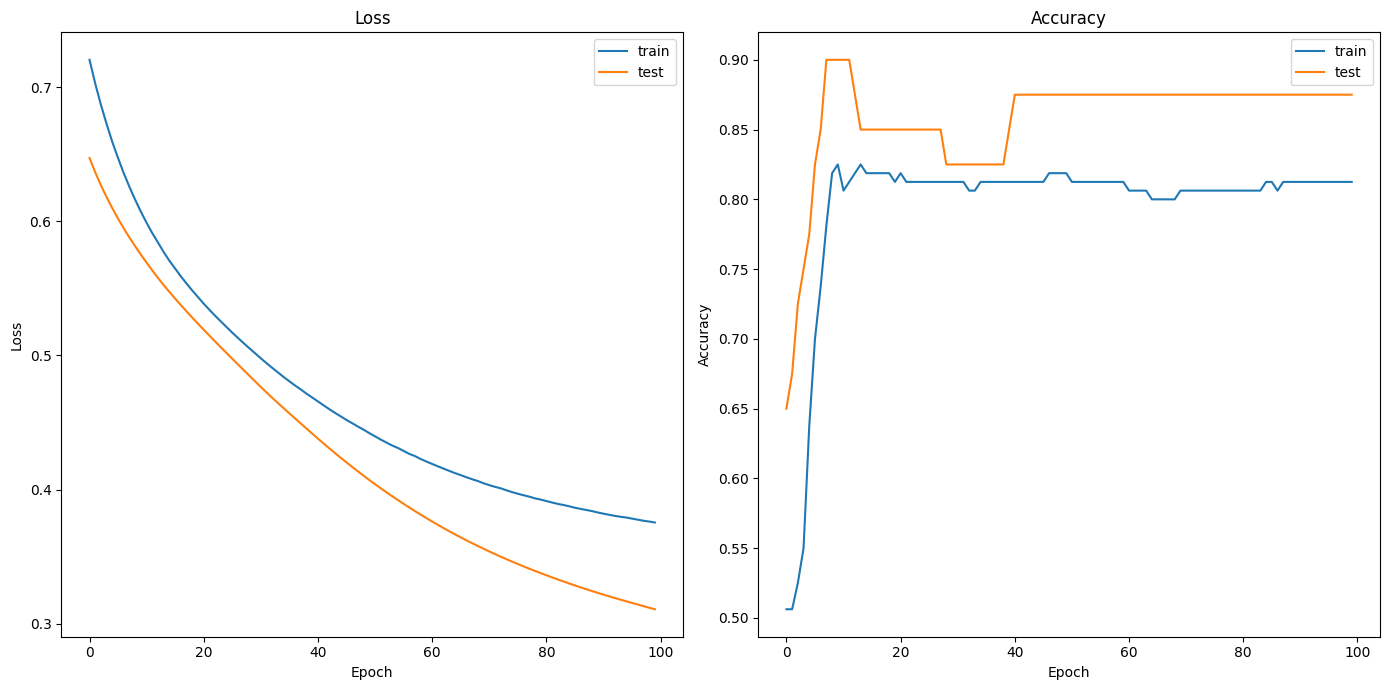

In [4]:
# Tratamiento de datos y creacion del modelo


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

K.clear_session()
model=build_model2()

history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,verbose=1)


_,train_acc=model.evaluate(X_train,y_train,verbose=0)
_,test_acc=model.evaluate(X_test,y_test,verbose=0)


print('Entrenamiento: %.3f, Test: %.3f' % (train_acc, test_acc))
plt.figure(figsize=(14, 7))

plt.subplot(121)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(122)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()


## Pregunta 2


2. Para el dataset load digits, construir un modelo de red neuronal empleando keras para realizar la clasificación.

In [17]:
digits=load_digits(n_class=6)
X,y=digits.data, digits.target
X=X/16
n_samples, n_features = X.shape



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [18]:
X.shape

(1083, 64)

Hay que tener en cuenta cuantos numeros posibles hay, noto al investigar en load_digits, que los numeros son enteros desde 0 hasta el 16(sin tomar el extremo superior) por tanto deben de haber en la capa de salida 16 neuronas, una para cada numero, pero esto se puede acotar al escoger n_class. Ahora, es claro que debo de cambiar la funcion de activacion para la capa de salida pues ya no es un caso binario(como si lo era el problema 1). Si no un caso de clasificación multiclase. Esto hace que él metodo de activación mas adecuado sea el de Softmax. Además que la capa de entrada, será el valor de n_features que es 64 (pues con esto se clasifica a todo el numero). Por ultimo se debe de cambiar el loss, pues ya no es un clasificador binario, investigando hay uno apropiado de multiclasificador que es sparse_categorial_crossentropy, así que usaré este

In [11]:
#@title Definición de modelo diferente


def build_model3(activation = 'sigmoid', loss='binary_crossentropy'):
  model = keras.models.Sequential()
  model.add(keras.layers.Dense(4, input_dim=64, activation='relu'))
  model.add(keras.layers.Dense(8, activation='relu'))
  model.add(keras.layers.Dense(6, activation = activation))
  opt = keras.optimizers.SGD(learning_rate=0.01)
  model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
  return model

In [12]:
K.clear_session()
model=build_model3(activation='softmax', loss='sparse_categorical_crossentropy')

history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.1556 - loss: 2.5338 - val_accuracy: 0.1751 - val_loss: 1.7741
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2364 - loss: 1.7556 - val_accuracy: 0.2350 - val_loss: 1.6847
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2969 - loss: 1.6456 - val_accuracy: 0.3456 - val_loss: 1.6063
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3046 - loss: 1.6022 - val_accuracy: 0.3779 - val_loss: 1.5242
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4757 - loss: 1.3472 - val_accuracy: 0.5576 - val_loss: 1.2329
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5732 - loss: 1.1671 - val_accuracy: 0.5853 - val_loss: 1.1404
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6230 - loss: 1.0764 - val_accuracy: 0.6083 - val_loss: 1.1639
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6236 - loss: 1.0456 - val_accuracy: 0.6267 - 

Entrenamiento: 0.999, Test: 0.982


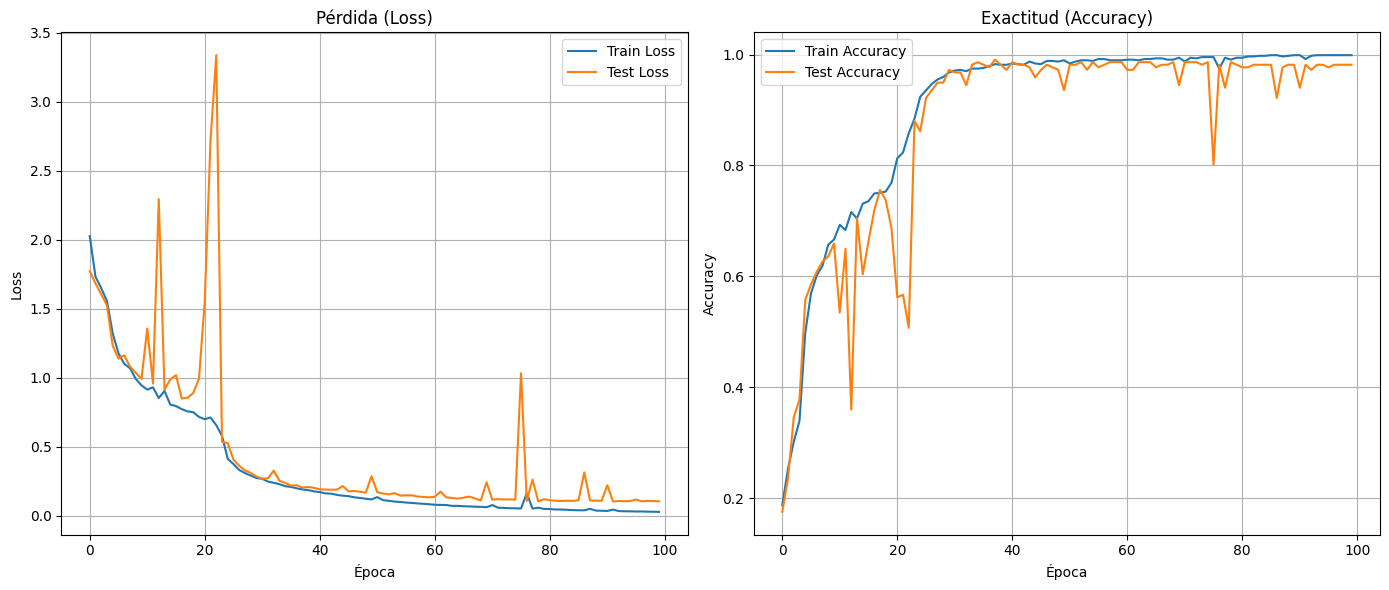

In [16]:


_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)

print('Entrenamiento: %.3f, Test: %.3f' % (train_acc, test_acc))

plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Pérdida (Loss)')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Exactitud (Accuracy)')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Claramente ambos son buenos moderos de clasificación en vista de las graficas.